# Linear Regression

Dataset: Production dataset with profit and other expenditure.

I have imported library numpy for mathmatical calculation, Pandas for dataframe functionality, matplotlib for visualising result and seaborn for producing statistical graph. 

In [4]:
# Imporing library.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns 
%matplotlib inline

## Importing datafile 

CSV file importing using pandas csv read function. 

In [5]:
# Importing the dataset using read function of pandas.
dataset = pd.read_csv('Product.csv')

Checking and understanding dataset, statistical analysis of dataset to know insights

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## EDA 

Creating some simple plots to check out the data and understanding the statistical relationship of attributes.
Exploring these types of relationships across the entire data set. 

Using seaborn pairplot library function to represent graph.

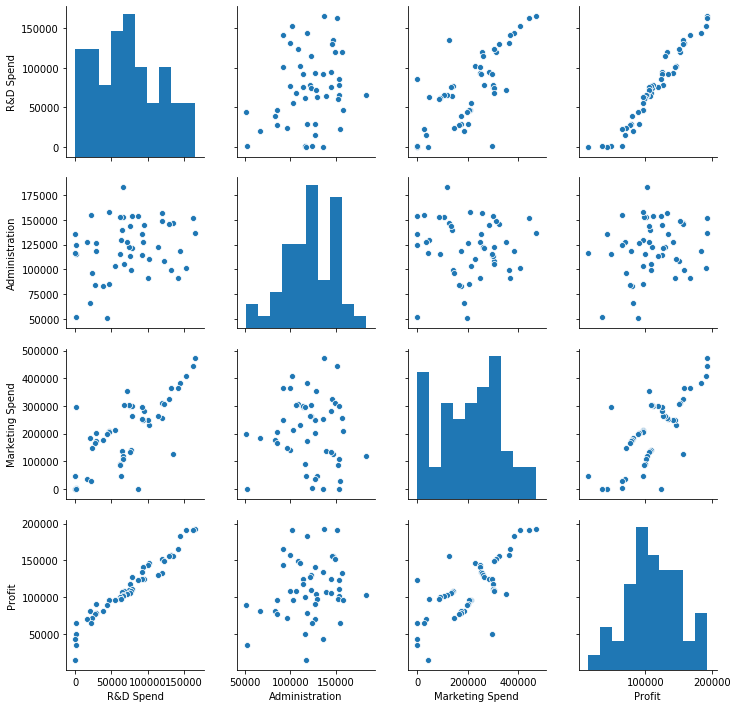

In [10]:
sns.pairplot(dataset)

Statistical distribution of depedent variable.

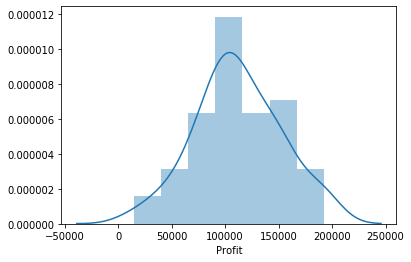

In [11]:
sns.distplot(dataset['Profit'])

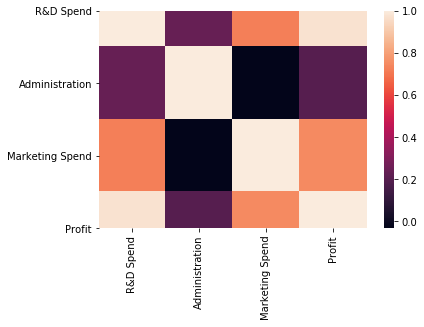

In [12]:
sns.heatmap(dataset.corr())

## Training a Linear Regression Model

I need to first split up our data into an X array that contains the features to train on in the case of linear reg model it is only Marketing Spend, and a y array with the target variable, in this case the Profit column.

In [13]:
X = dataset.iloc[:, 2:-2].values  # Marketing Spend
y = dataset.iloc[:, 4].values   # Profit

## Train Test Split

spliting the data into a training set and a testing set. I will train out model on the training set and then use the test set to evaluate the model.

i have taken 1/3 of dataset for test and train. In my exprement 1/3 or 1/4 are giving same result due to the small size of dataset. 

I have used 'train_test_split' function from Sklearn library to split the depedent and indepedent variable for model training and testing.  

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Creating and Training the Model

Calling Linear Regression function from SKlearn libraary. Preparing a regressor to fit on depedend and indepedent training dataset.

In [15]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation 

Interpreting the model to evaluate.

In [16]:
# print the intercept 
print(regressor.intercept_)

60253.45083973978


## Predictions from our Model

Now using linear regressor training model to generate prdiction of test data.

In [25]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

My R-squared value shows good or bad fit 

In [37]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)

In [38]:
r_value ** 2

0.518439883461961

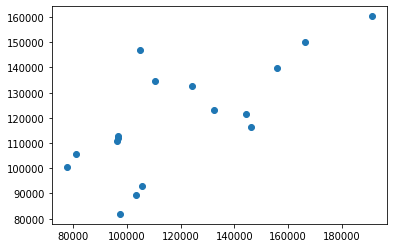

In [28]:
plt.scatter(y_test,y_pred)

Evaluating the model performance by calculating the residual sum of squares and the explained variance score (R^2)

Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [30]:
# calculating these metrics.

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19664.654662373476
MSE: 457228472.71638244
RMSE: 21382.901410154387


## Residuals 

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

Exploring the residuals to make sure everything was okay with our data.


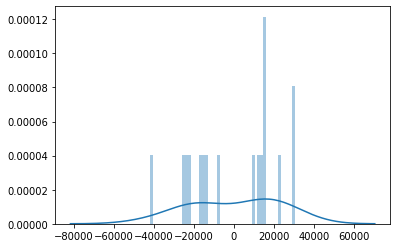

In [31]:
sns.distplot((y_test-y_pred),bins=50);

## Visualizing Linear line on data

Ploting linear reg line on train data to see the co-relation.

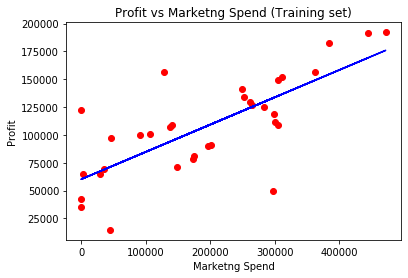

In [32]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Profit vs Marketng Spend (Training set)')
plt.xlabel('Marketng Spend')
plt.ylabel('Profit')
plt.show()

Ploting linear reg line on test data to see the co-relation.

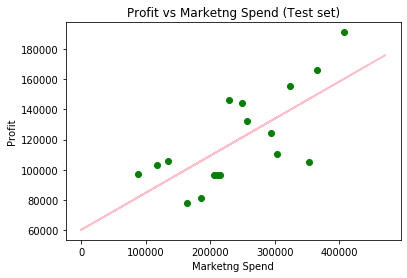

In [33]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'pink')
plt.title('Profit vs Marketng Spend (Test set)')
plt.xlabel('Marketng Spend')
plt.ylabel('Profit')
plt.show()


Linear Reg line represent the relation bitween Profit and Marketing spenditure.
Due to small data the model is not able to make good linear line .

